# 대기오염 예측 AI 모델 개발 대회

In [1]:
import pandas as pd
import os

## 대회설명 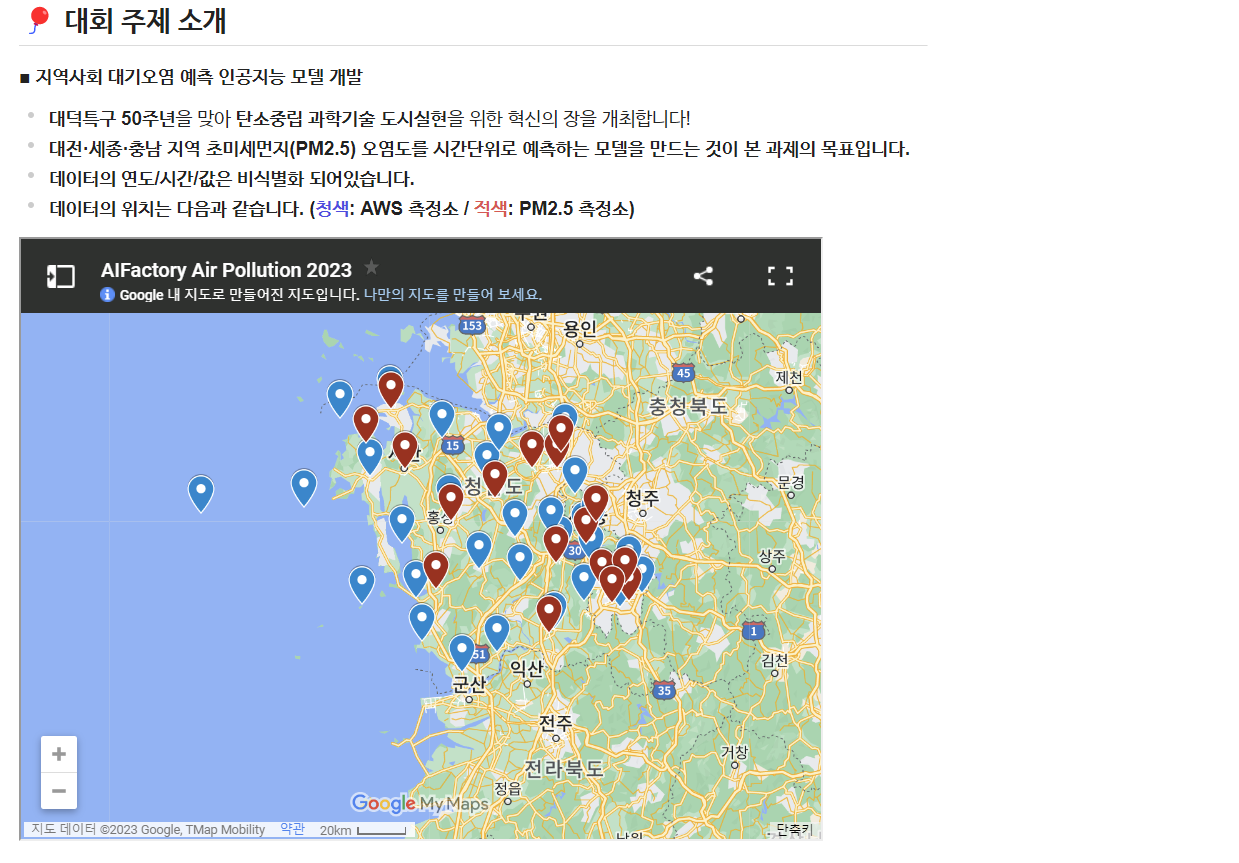

# DATA 파악

In [2]:
path_dir = "C:/Users/legg0/Desktop/기상_예측대회/dataset"
train_dir = "C:/Users/legg0/Desktop/기상_예측대회/dataset/TRAIN"
trainaws_dir = "C:/Users/legg0/Desktop/기상_예측대회/dataset/TRAIN_AWS"
file_list = os.listdir(path_dir)
train_list = os.listdir(train_dir)
trainaws_list = os.listdir(trainaws_dir)

In [3]:
print(len(set(trainaws_list) - set(train_list)))
print(len(set(train_list) - set(trainaws_list)))
print(len(train_list))
print(len(trainaws_list))

28
15
17
30


In [72]:
train_list

['공주.csv',
 '노은동.csv',
 '논산.csv',
 '대천2동.csv',
 '독곶리.csv',
 '동문동.csv',
 '모종동.csv',
 '문창동.csv',
 '성성동.csv',
 '신방동.csv',
 '신흥동.csv',
 '아름동.csv',
 '예산군.csv',
 '읍내동.csv',
 '이원면.csv',
 '정림동.csv',
 '홍성읍.csv']

Train, Train_aws와 두개가 겹침

In [4]:
file_list

['answer_sample.csv', 'META', 'TEST_AWS', 'TEST_INPUT', 'TRAIN', 'TRAIN_AWS']

In [5]:
META_PATH = "C:/Users/legg0/Desktop/기상_예측대회/dataset/META/"
TESTAWS_PATH = "C:/Users/legg0/Desktop/기상_예측대회/dataset/TEST_AWS/"
TESTINPUT_PATH = "C:/Users/legg0/Desktop/기상_예측대회/dataset/TEST_INPUT/"
TRAIN_PATH = "C:/Users/legg0/Desktop/기상_예측대회/dataset/TRAIN/"
TRAINAWS_PATH = "C:/Users/legg0/Desktop/기상_예측대회/dataset/TRAIN_AWS/"

meta =  pd.read_csv(META_PATH + "awsmap.csv")
testaws =  pd.read_csv(TESTAWS_PATH + "계룡.csv")
testinput =  pd.read_csv(TESTINPUT_PATH + "공주.csv")
train = pd.read_csv(TRAIN_PATH + "공주.csv")
trainaws = pd.read_csv(TRAINAWS_PATH + "공주.csv")


In [6]:
meta.head()

,Location,Latitude,Longitude,Description
0,오월드,36.2913,127.3959,대전광역시 중구사정공원로 70 오월드 내 플라워랜드
1,세천,36.3402,127.4938,대전광역시 동구세천동 63-1
2,장동,36.4135,127.4382,대전광역시 대덕구장동 360-2
3,세종고운,36.5315,127.2406,세종특별자치시 고운동산 25번지
4,세종금남,36.4585,127.2688,세종특별자치시 시군구금남면 성덕리 77-3


In [7]:
testaws.head()

,연도,일시,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,4,01-01 00:00,계룡,0.244866,0.281667,0.020460,0.0,0.622
1,4,01-01 01:00,계룡,0.224329,0.365833,0.015345,0.0,0.691
2,4,01-01 02:00,계룡,0.195893,0.000000,0.010230,0.0,0.772
3,4,01-01 03:00,계룡,0.173776,0.223333,0.015345,0.0,0.808
4,4,01-01 04:00,계룡,0.164297,0.000000,0.005115,0.0,0.812


In [8]:
testinput.head()

,연도,일시,측정소,PM2.5
0,4,01-01 00:00,공주,0.060
1,4,01-01 01:00,공주,0.064
2,4,01-01 02:00,공주,0.072
3,4,01-01 03:00,공주,0.064
4,4,01-01 04:00,공주,0.056


In [9]:
print(train.shape)
train.head()

(35064, 4)


,연도,일시,측정소,PM2.5
0,0,01-01 00:00,공주,0.056
1,0,01-01 01:00,공주,0.060
2,0,01-01 02:00,공주,0.068
3,0,01-01 03:00,공주,0.060
4,0,01-01 04:00,공주,0.068


In [10]:
print(trainaws.shape)
trainaws.head()

(35064, 8)


,연도,일시,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,0,01-01 00:00,공주,0.173776,0.201944,0.023018,0.0,0.828
1,0,01-01 01:00,공주,0.176935,0.168611,0.030691,0.0,0.831
2,0,01-01 02:00,공주,0.180095,0.087222,0.033248,0.0,0.784
3,0,01-01 03:00,공주,0.178515,0.087222,0.025575,0.0,0.745
4,0,01-01 04:00,공주,0.164297,0.113889,0.020460,0.0,0.750


겹치는 동네는 날짜 데이터 및 로우의 크기가 동일함

In [11]:
len(set(testinput) - set(train))

0

Cold START 존재 X

In [12]:
len(trainaws)

35064

# 측정소 Matching

In [47]:
META_PATH = "C:/Users/legg0/Desktop/기상_예측대회/dataset/META/"

aws_meta =  pd.read_csv(META_PATH + "awsmap.csv")
pm_meta = pd.read_csv(META_PATH + "pmmap.csv")

In [39]:
aws_meta.head()

,Location,Latitude,Longitude,Description
0,오월드,36.2913,127.3959,대전광역시 중구사정공원로 70 오월드 내 플라워랜드
1,세천,36.3402,127.4938,대전광역시 동구세천동 63-1
2,장동,36.4135,127.4382,대전광역시 대덕구장동 360-2
3,세종고운,36.5315,127.2406,세종특별자치시 고운동산 25번지
4,세종금남,36.4585,127.2688,세종특별자치시 시군구금남면 성덕리 77-3


In [48]:
pm_meta.head()

,Location,Latitude,Longitude,Description
0,아름동,36.512252,127.246789,세종특별자치시 보듬3로 114 아름동커뮤니티센터 옥상 (아름동)
1,신흥동,36.592887,127.292550,세종 조치원읍 군청로 87-16(신흥동) 세종특별자치시 조치원청사 옥상
2,노은동,36.368242,127.318498,대전 유성구 노은동로 87번길 89(노은1동 주민센터) 노은1동 주민센터 3층 옥상
3,문창동,36.317215,127.437825,대전 중구 보문로 20번길 38(문창동 주민센터) 문창동 주민센터
4,읍내동,36.372388,127.417714,대전 대덕구 대전로 1331번길 75(태아산업(주)) 태아산업(주)


## Matching

In [56]:
pm_meta.iloc[0, :3][0]

'아름동'

- 위도, 경도 활용하여 Matching

In [71]:
from collections import defaultdict
pm_meta.iloc[:1, :3]
aws_meta.iloc[:1, :3]
pm_dict = defaultdict()

for i in range(pm_meta.shape[0]):
    pm_tmp = pm_meta.iloc[i, :3]
    pmLocation, pmLatitude, pmLongitude = pm_tmp[0], pm_tmp[1], pm_tmp[2]
    aws_dict = defaultdict()
    
    for j in range(aws_meta.shape[0]):
        aws_tmp = aws_meta.iloc[j, :3]
        awsLocation, awsLatitude, awsLongitude = aws_tmp[0], aws_tmp[1], aws_tmp[2]
        
        # 거리 계산
        aws_dict[awsLocation] = ((pmLatitude - awsLatitude) ** 2 + (pmLongitude - awsLongitude) **2) ** 0.5
        
    min_idx = list(aws_dict.values()).index(min(aws_dict.values()))
    pm_dict[pmLocation] = list(aws_dict.keys())[min_idx]
    
pm_dict

defaultdict(None,
            {'아름동': '세종고운',
             '신흥동': '세종연서',
             '노은동': '계룡',
             '문창동': '오월드',
             '읍내동': '장동',
             '정림동': '오월드',
             '공주': '공주',
             '논산': '논산',
             '대천2동': '대천항',
             '독곶리': '대산',
             '동문동': '태안',
             '모종동': '아산',
             '신방동': '성거',
             '예산군': '예산',
             '이원면': '태안',
             '홍성읍': '홍북',
             '성성동': '성거'})

## AWS & PM2.5 데이터셋 Matching

In [83]:
MERGED_TRAIN =' C:/Users/legg0/Desktop/기상_예측대회/dataset/MERGED_TRAIN/'

In [91]:
pm_list = list(pm_dict.keys())
aws_list = list(pm_dict.values())
# MERGED_TRAIN =' C:/Users/legg0/Desktop/기상_예측대회/dataset/MERGED_TRAIN/'

for i in range(len(train_list)):
    pm = pm_list[i] + '.csv'
    aws = aws_list[i] + '.csv'
    # print(pm, MERGED_TRAIN + pm)
    pm_csv = pd.read_csv(TRAIN_PATH + pm)
    aws_csv = pd.read_csv(TRAINAWS_PATH + aws)
    
    pm_csv = pm_csv.merge(aws_csv, how = 'left', on = ['연도', '일시'])
    pm_csv.to_csv(pm, index = False)
pm_csv.head()
    

아름동.csv  C:/Users/legg0/Desktop/기상_예측대회/dataset/MERGED_TRAIN/아름동.csv
신흥동.csv  C:/Users/legg0/Desktop/기상_예측대회/dataset/MERGED_TRAIN/신흥동.csv
노은동.csv  C:/Users/legg0/Desktop/기상_예측대회/dataset/MERGED_TRAIN/노은동.csv
문창동.csv  C:/Users/legg0/Desktop/기상_예측대회/dataset/MERGED_TRAIN/문창동.csv
읍내동.csv  C:/Users/legg0/Desktop/기상_예측대회/dataset/MERGED_TRAIN/읍내동.csv
정림동.csv  C:/Users/legg0/Desktop/기상_예측대회/dataset/MERGED_TRAIN/정림동.csv
공주.csv  C:/Users/legg0/Desktop/기상_예측대회/dataset/MERGED_TRAIN/공주.csv
논산.csv  C:/Users/legg0/Desktop/기상_예측대회/dataset/MERGED_TRAIN/논산.csv
대천2동.csv  C:/Users/legg0/Desktop/기상_예측대회/dataset/MERGED_TRAIN/대천2동.csv
독곶리.csv  C:/Users/legg0/Desktop/기상_예측대회/dataset/MERGED_TRAIN/독곶리.csv
동문동.csv  C:/Users/legg0/Desktop/기상_예측대회/dataset/MERGED_TRAIN/동문동.csv
모종동.csv  C:/Users/legg0/Desktop/기상_예측대회/dataset/MERGED_TRAIN/모종동.csv
신방동.csv  C:/Users/legg0/Desktop/기상_예측대회/dataset/MERGED_TRAIN/신방동.csv
예산군.csv  C:/Users/legg0/Desktop/기상_예측대회/dataset/MERGED_TRAIN/예산군.csv
이원면.csv  C:/Users/legg0/Desktop/기상_예

,연도,일시,측정소,PM2.5,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,0,01-01 00:00,성성동,0.044,성거,0.157978,0.0125,0.012788,0.0,0.615
1,0,01-01 01:00,성성동,0.040,성거,0.153239,0.0000,0.007673,0.0,0.593
2,0,01-01 02:00,성성동,0.048,성거,0.137441,0.0000,0.010230,0.0,0.674
3,0,01-01 03:00,성성동,0.056,성거,0.115324,0.0000,0.010230,0.0,0.705
4,0,01-01 04:00,성성동,0.048,성거,0.112164,0.0000,0.000000,0.0,0.732


In [78]:
aws_csv.head()

,연도,일시,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,0,01-01 00:00,성거,0.157978,0.0125,0.012788,0.0,0.615
1,0,01-01 01:00,성거,0.153239,0.0000,0.007673,0.0,0.593
2,0,01-01 02:00,성거,0.137441,0.0000,0.010230,0.0,0.674
3,0,01-01 03:00,성거,0.115324,0.0000,0.010230,0.0,0.705
4,0,01-01 04:00,성거,0.112164,0.0000,0.000000,0.0,0.732


# 지역 별로 DATA 그룹화

## 1-1. 세종 - TRAIN AWS

In [13]:
trainaws_list[:10]

['계룡.csv',
 '공주.csv',
 '논산.csv',
 '당진.csv',
 '대산.csv',
 '대천항.csv',
 '북격렬비도.csv',
 '서천.csv',
 '성거.csv',
 '세종고운.csv']

In [14]:
Sejong_aws1 = pd.read_csv(TRAINAWS_PATH+ '세종고운.csv')
Sejong_aws2 = pd.read_csv(TRAINAWS_PATH+ '세종금남.csv')
Sejong_aws3 = pd.read_csv(TRAINAWS_PATH+ '세종연서.csv')
Sejong_aws4 = pd.read_csv(TRAINAWS_PATH+ '세종전의.csv')

Sejong_aws_dong = set(['세종고운.csv', '세종금남.csv', '세종연서.csv', '세종전의.csv'])

In [15]:
print(Sejong_aws1.shape)
print(Sejong_aws2.shape)
print(Sejong_aws3.shape)
print(Sejong_aws4.shape)

(35064, 8)
(35064, 8)
(35064, 8)
(35064, 8)


In [16]:
Sejong_aws = pd.concat([Sejong_aws1, Sejong_aws2, Sejong_aws3, Sejong_aws4])
print('세종 aws 크기 : ', Sejong_aws.shape)

세종 aws 크기 :  (140256, 8)


In [17]:
Sejong_aws.head()

,연도,일시,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,0,01-01 00:00,세종고운,0.170616,0.053333,0.017903,0.0,0.764
1,0,01-01 01:00,세종고운,0.167457,0.099444,0.020460,0.0,0.759
2,0,01-01 02:00,세종고운,0.162717,0.134167,0.012788,0.0,0.760
3,0,01-01 03:00,세종고운,0.157978,0.000000,0.005115,0.0,0.747
4,0,01-01 04:00,세종고운,0.148499,0.000000,0.007673,0.0,0.791


In [18]:
print('-' * 200)
print()
print('세종 AWS DataFrame 제작 완성')
print()
print('-' * 200)


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

세종 AWS DataFrame 제작 완성

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## 1-2. 세종 - TRAIN PM 2.5

  {'아름동': '세종고운',
             '신흥동': '세종연서',
             '노은동': '계룡',
             '문창동': '오월드',
             '읍내동': '장동',
             '정림동': '오월드',
             '공주': '공주',
             '논산': '논산',
             '대천2동': '대천항',
             '독곶리': '대산',
             '동문동': '태안',
             '모종동': '아산',
             '신방동': '성거',
             '예산군': '예산',
             '이원면': '태안',
             '홍성읍': '홍북',
             '성성동': '성거'})

In [93]:
TRAIN_PATH = "C:/Users/legg0/Desktop/기상_예측대회/"
Sejong_train1 = pd.read_csv(TRAIN_PATH+ '아름동.csv')
Sejong_train2 = pd.read_csv(TRAIN_PATH+ '신흥동.csv')

print(Sejong_train1.shape)
print(Sejong_train2.shape)

Sejong_train_list = set(['아름동.csv', '신흥동.csv'])

(35064, 10)
(35064, 10)


### PM2.5 <-> AWS Matching

In [94]:
Sejong_train = pd.concat([Sejong_train1, Sejong_train2])
print('세종 크기 : ', Sejong_train.shape)

세종 크기 :  (70128, 10)


In [95]:
Sejong_train.head()

,연도,일시,측정소,PM2.5,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,0,01-01 00:00,아름동,0.044,세종고운,0.170616,0.053333,0.017903,0.0,0.764
1,0,01-01 01:00,아름동,0.048,세종고운,0.167457,0.099444,0.020460,0.0,0.759
2,0,01-01 02:00,아름동,0.060,세종고운,0.162717,0.134167,0.012788,0.0,0.760
3,0,01-01 03:00,아름동,0.064,세종고운,0.157978,0.000000,0.005115,0.0,0.747
4,0,01-01 04:00,아름동,0.064,세종고운,0.148499,0.000000,0.007673,0.0,0.791


In [22]:
print('-' * 200)
print()
print('세종 AWS DataFrame 제작 완성')
print()
print('-' * 200)
print()
print('함수화해서 TEST SET에도 적용할 것')

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

세종 AWS DataFrame 제작 완성

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

함수화해서 TEST SET에도 적용할 것


## 2-1. 대전- TRAIN AWS

In [23]:
Daejeon_aws1 = pd.read_csv(TRAINAWS_PATH+ '오월드.csv')
Daejeon_aws2 = pd.read_csv(TRAINAWS_PATH+ '세천.csv')
Daejeon_aws3 = pd.read_csv(TRAINAWS_PATH+ '장동.csv')

Daejeon_aws = pd.concat([Daejeon_aws1, Daejeon_aws2, Daejeon_aws3])
print('대전 aws 크기 : ', Daejeon_aws.shape)

Daejeon_aws_dong = set(['오월드.csv', '세천.csv', '장동.csv'])

대전 aws 크기 :  (105192, 8)


In [24]:
print(Daejeon_aws1.shape)
print(Daejeon_aws2.shape)
print(Daejeon_aws3.shape)

(35064, 8)
(35064, 8)
(35064, 8)


In [25]:
Daejeon_aws.head()

,연도,일시,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,0,01-01 00:00,오월드,0.211690,0.953056,0.033248,0.0,0.791
1,0,01-01 01:00,오월드,0.205371,0.045556,0.028133,0.0,0.771
2,0,01-01 02:00,오월드,0.199052,0.890833,0.028133,0.0,0.733
3,0,01-01 03:00,오월드,0.194313,0.114167,0.043478,0.0,0.774
4,0,01-01 04:00,오월드,0.194313,0.130833,0.025575,0.0,0.700


In [26]:
print('-' * 200)
print()
print('대전 AWS DataFrame 제작 완성')
print()
print('-' * 200)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

대전 AWS DataFrame 제작 완성

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## 2-2. 대전 - TRAIN

In [96]:
TRAIN_PATH = "C:/Users/legg0/Desktop/기상_예측대회/"
Daejeon_train1 = pd.read_csv(TRAIN_PATH+ '노은동.csv')
Daejeon_train2 = pd.read_csv(TRAIN_PATH+ '정림동.csv')
Daejeon_train3 = pd.read_csv(TRAIN_PATH+ '문창동.csv')
Daejeon_train4 = pd.read_csv(TRAIN_PATH+ '읍내동.csv')

Daejeon_train = pd.concat([Daejeon_train1, Daejeon_train2, Daejeon_train3, Daejeon_train4])
print('대전 train 크기 : ', Daejeon_train.shape)

Daejeon_train_list = set(['노은동.csv', '정림동.csv', '문창동.csv', '읍내동.csv'])

대전 train 크기 :  (140256, 10)


In [97]:
print(Daejeon_train1.shape)
print(Daejeon_train2.shape)
print(Daejeon_train3.shape)
print(Daejeon_train4.shape)

(35064, 10)
(35064, 10)
(35064, 10)
(35064, 10)


In [98]:
Daejeon_train.head()

,연도,일시,측정소,PM2.5,지점,기온(°C),풍향(deg),풍속(m/s),강수량(mm),습도(%)
0,0,01-01 00:00,노은동,0.052,계룡,0.154818,0.410833,0.033248,0.0,0.830
1,0,01-01 01:00,노은동,0.072,계룡,0.142180,0.148611,0.030691,0.0,0.853
2,0,01-01 02:00,노은동,0.068,계룡,0.173776,0.203889,0.040921,0.0,0.802
3,0,01-01 03:00,노은동,0.064,계룡,0.169036,0.330556,0.048593,0.0,0.816
4,0,01-01 04:00,노은동,0.064,계룡,0.169036,0.000000,0.007673,0.0,0.827


In [99]:
print('-' * 200)
print()
print('대전 Train DataFrame 제작 완성')
print()
print('-' * 200)
print()
print('함수화해서 TEST SET에도 적용할 것')

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

대전 Train DataFrame 제작 완성

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

함수화해서 TEST SET에도 적용할 것


## 3-1. 충남 - TRAIN AWS

- 세종, 대전 지역의 AWS, TRAIN 제외하고 진행 (23개)

In [31]:
SD = Sejong_aws_dong.union(Daejeon_aws_dong)
SD
chungnam_aws = list(set(trainaws_list) - SD)
len(chungnam_aws)

23

In [32]:
for i in range(len(chungnam_aws)):
    if i == 1:
        tmp = pd.read_csv(TRAINAWS_PATH+ chungnam_aws[i])
        cn_df = pd.concat([tmp, first])
    elif i == 0:
        first = pd.read_csv(TRAINAWS_PATH+ chungnam_aws[0])
    else:
        tmp = pd.read_csv(TRAINAWS_PATH+ chungnam_aws[i])
        cn_df = pd.concat([cn_df, tmp])

cn_df.shape

(806472, 8)

## 3-2. 충남 - TRAIN

11개

In [100]:
SD = Sejong_train_list.union(Daejeon_train_list)
SD
chungnam_train = list(set(train_list) - SD)
len(chungnam_train)
print(len(chungnam_train))
print(SD)

11
{'정림동.csv', '아름동.csv', '문창동.csv', '신흥동.csv', '노은동.csv', '읍내동.csv'}


In [101]:
TRAIN_PATH = "C:/Users/legg0/Desktop/기상_예측대회/"
for i in range(len(chungnam_train)):
    if i == 1:
        tmp = pd.read_csv(TRAIN_PATH+ chungnam_train[i])
        cn_train_df = pd.concat([tmp, first])
    elif i == 0:
        first = pd.read_csv(TRAIN_PATH+ chungnam_train[0])
    else:
        tmp = pd.read_csv(TRAIN_PATH+ chungnam_train[i])
        cn_train_df = pd.concat([cn_train_df, tmp])

cn_train_df.shape

(385704, 10)

# DATA 병합

- 지역 구분 파생변수 생성

In [106]:
Cn_train = cn_train_df
Cn_train["지역번호"] = 3
Daejeon_train["지역번호"] = 2
Sejong_train["지역번호"] = 1

- 세 지역 병합

In [110]:
train = pd.concat([Sejong_train, Daejeon_train, Cn_train])

In [113]:
train.to_csv('train.csv', index =False)